In [6]:
import typing

import numpy as np
import matplotlib.pyplot as plt
import random
import time

W pierwszym zadaniu dążymy do zaimplementowania generatora liczb pseudolosowych ACORN, czyli generatora k-tego rzędu opartego na ciągach liczbowych zdefiniowanych poprzez równania rekurencyjne:
$$
X^0_n = X^0_{n-1}, n \geq 1
$$
$$
X^m_n = (X^{m-1}_n + X^m_{n-1}) mod M, m=1,..., k
$$
$$
Y^k_n = X^k_n/M, n \geq 1.
$$
Zaimplementujemy go jako funkcję ACORN(N, k, M, Lag) zwracającą N liczb pseudolosowaych $Y^k_n$, dla n=1,...N, korzystając z algorytmu k-tego rzędu, przy ominięciu pierwszych Lag wyrazów. 

In [7]:
M = 2**89 - 1
k = 9
Lag = 10**3
N = 3000
def ACORN(N: int, k : int, M: int, Lag: int) -> list[float]:
    """
    Funkcja zwraca N liczb pseudolosowych wygenerowanych metodą ACORN

    Parametry:
    N (int): liczba liczb pseudolosowych do zwrócenia
    k (int): liczba "dodatnich wartości" rzędów (k=0 pominięte)
    M (int): liczbak względem której działa cały algorytm 
    Lag (int): ominięte wyrazy z k-tego rzędu

    Zwraca:
    Yk (list): lista N liczb pseudolosowych generowana metodą ACORN

    """
    lista = [np.zeros(N+Lag+1) for _ in range(k+1)]
    seed  = random.randint(1,M-1)
    for i in range(len(lista[0])):
        lista[0][i] = seed
    pozycja = 1
    rzad = 1
    start = time.time()
    while True:
        lista[rzad][pozycja] = (lista[rzad][pozycja-1]+lista[rzad-1][pozycja])%M
        pozycja+=1
        if pozycja==N+Lag+1:
            if rzad == k:
                Yk = lista[k][Lag:]/M
                break
            rzad += 1
            pozycja = 1
    return Yk

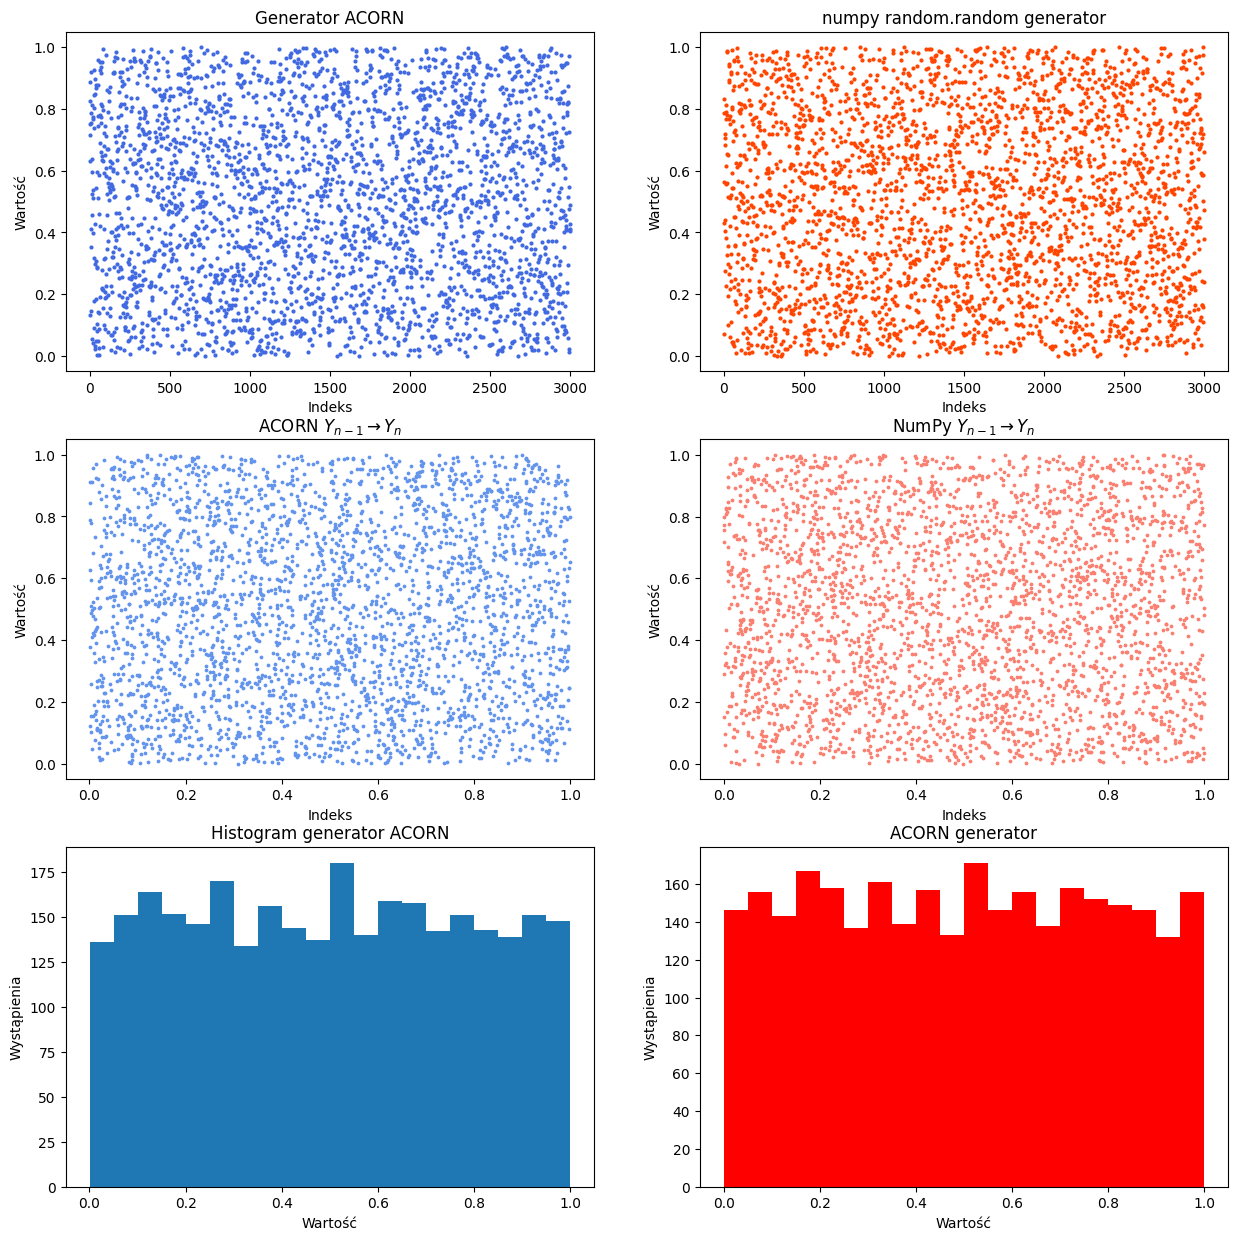

In [8]:

plt.figure(figsize=(15, 15))


Yk = ACORN(N, k, M, Lag)
Y_np = np.random.random(N+1)
plt.subplot(3, 2, 1)
plt.plot(Yk,'o',markersize=2,color="royalblue")
plt.title('Generator ACORN')
plt.xlabel('Indeks')
plt.ylabel('Wartość')

plt.subplot(3, 2, 3)
plt.scatter(Yk[:-1],Yk[1:],s=3,color="cornflowerblue")
plt.title('ACORN $Y_{n-1} \\rightarrow Y_n$')
plt.xlabel('Indeks')
plt.ylabel('Wartość')

plt.subplot(3, 2, 5)
plt.hist(Yk,bins=20)
plt.title('Histogram generator ACORN')
plt.xlabel('Wartość')
plt.ylabel('Wystąpienia')

plt.subplot(3, 2, 2)
plt.plot(Y_np,'o',markersize=2,color="orangered")
plt.title('numpy random.random generator')
plt.xlabel('Indeks')
plt.ylabel('Wartość')

plt.subplot(3, 2, 4)
plt.scatter(Y_np[:-1],Y_np[1:],s=3,color="salmon")
plt.title('NumPy $Y_{n-1} \\rightarrow Y_n$')
plt.xlabel('Indeks')
plt.ylabel('Wartość')

plt.subplot(3, 2, 6)
plt.hist(Y_np,bins=20,color="red")
plt.title('ACORN generator')
plt.xlabel('Wartość')
plt.ylabel('Wystąpienia')
plt.show()

In [9]:
def ACORN_czas(N: int, k: int, M: int, Lag: int) -> float:
    """
    Funckja zwraca czas trwania algorytmu ACORN

    Parametry
    N (int): liczba liczb pseudolosowych do zwrócenia
    k (int): liczba "dodatnich wartości" rzędów (k=0 pominięte)
    M (int): liczbak względem której działa cały algorytm 
    Lag (int): ominięte wyrazy z k-tego rzędu

    Zwraca:
    (float): czas trwania

    """
    start_acorn = time.time()
    ACORN(N, k, M, Lag)
    end_acorn = time.time()
    return end_acorn-start_acorn

def NP_czas(N: int) -> float:
    """
    Funckja zwracjąca czas trwania algorytmu ACORN

    Parametry:
    N (int): liczba liczb pseudolosowych do zwrócenia

    Zwraca:
    (float): czas trwania
    
    """
    start_np = time.time()
    np.random.random(N+1)
    end_np = time.time()
    return end_np-start_np

czas_acorn = 0
czas_np=0
for tim in range(50):
    czas_acorn+=ACORN_czas(N, k, M, Lag)
    czas_np += NP_czas(N)


print(f"Czas ACORN: {czas_acorn/50} sekundy")
print(f"Czas numpy: {czas_np/50} sekundy")


Czas ACORN: 0.041046338081359865 sekundy
Czas numpy: 2.1243095397949217e-05 sekundy


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


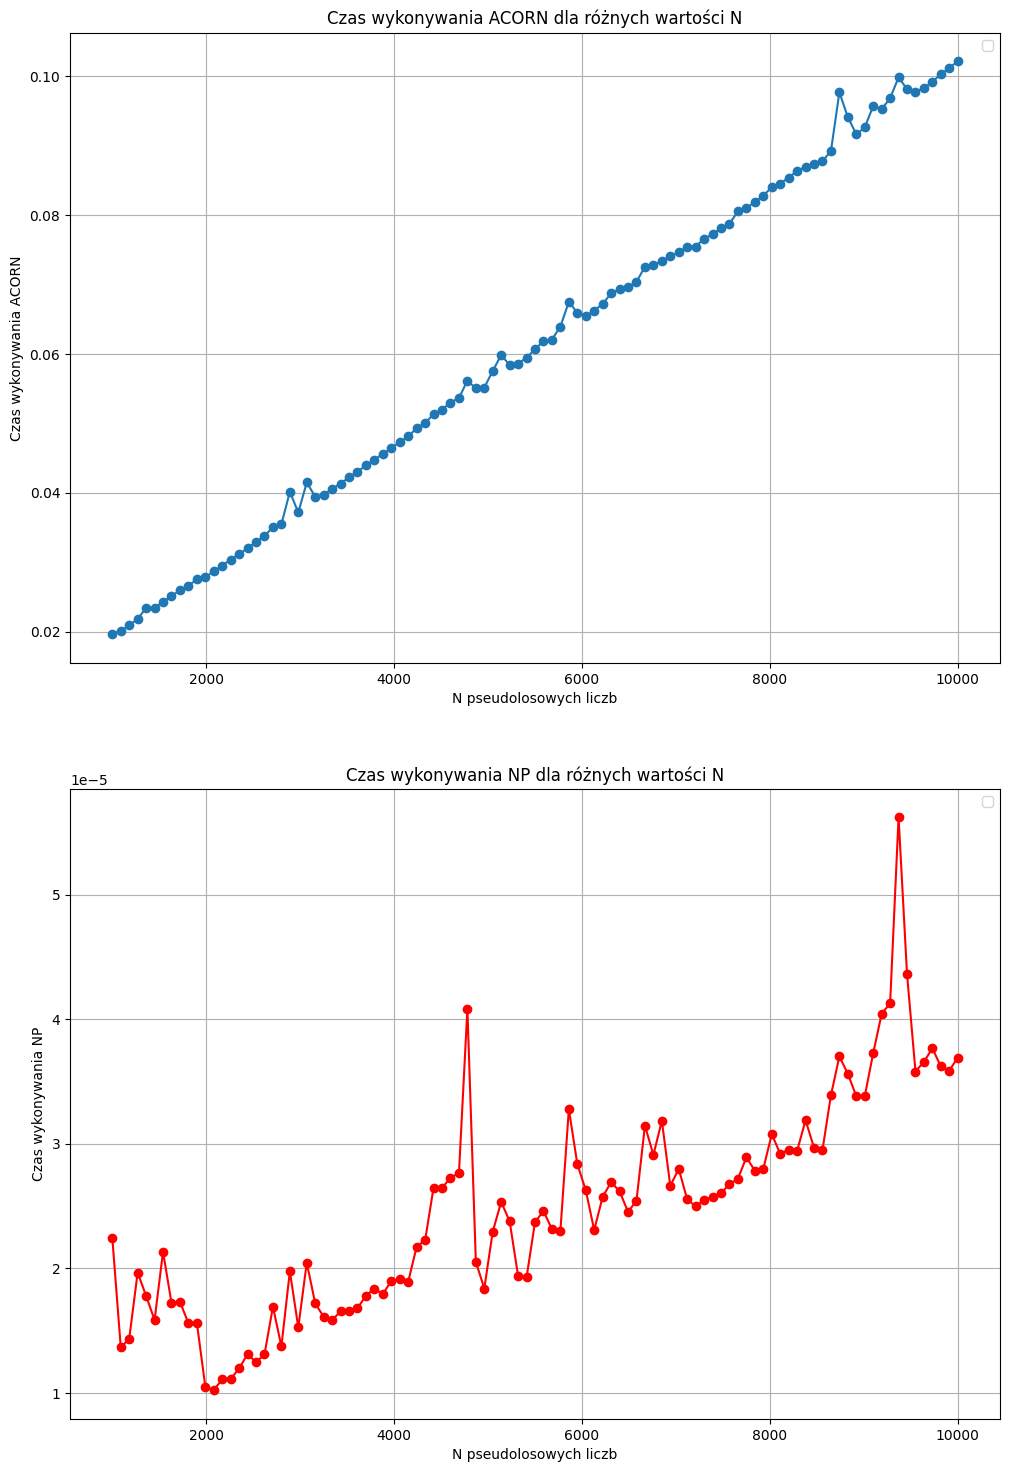

In [10]:
przedzial = 101
N2= np.linspace(1000, 10000,przedzial)

#listy dla przechowania wyników czasów
ACORN_czasy=np.zeros(przedzial)
NP_czasy=np.zeros(przedzial)
przedzialy = 0
for ns in N2:
    CZAS_ACORN = 0
    CZAS_NP = 0
    for tim in range(10):
        CZAS_ACORN+=ACORN_czas(int(ns), k, M, Lag)
        CZAS_NP += NP_czas(int(ns))
    ACORN_czasy[przedzialy] = CZAS_ACORN/10
    NP_czasy[przedzialy] = CZAS_NP/10
    przedzialy+=1

plt.figure(figsize=(12, 18))

plt.subplot(2, 1, 1)
plt.plot(N2, ACORN_czasy, 'o-')
plt.xlabel('N pseudolosowych liczb')
plt.ylabel('Czas wykonywania ACORN')
plt.title('Czas wykonywania ACORN dla różnych wartości N')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(N2, NP_czasy, 'o-', color='red')
plt.xlabel('N pseudolosowych liczb')
plt.ylabel('Czas wykonywania NP')
plt.title('Czas wykonywania NP dla różnych wartości N')
plt.grid()